In [1]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv
from scripts.data_preprocessing import load_data, exclude_outliers
from sklearn.svm import SVR

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
# svr = SVR()

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


LOOCV
R squared (LOOCV): -2.164141925956787
Average MSE (LOOCV): 106.11833931935186
Average RMSE (LOOCV): 10.301375603255707
Average MAE (LOOCV): 4.301092120658247


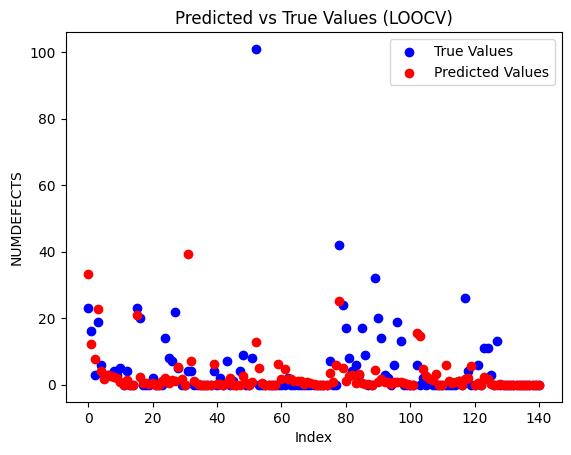

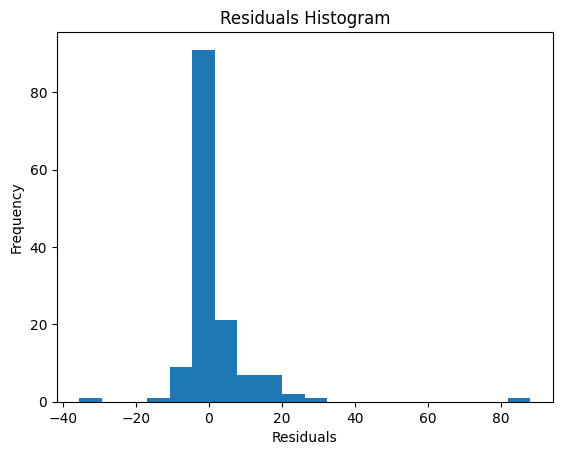


10-fold
Mean MSE: 111.71210353140832
Mean MAE: 4.59073062921949
Mean R2: -0.32556477495390485
RMSE 10.569394662486983


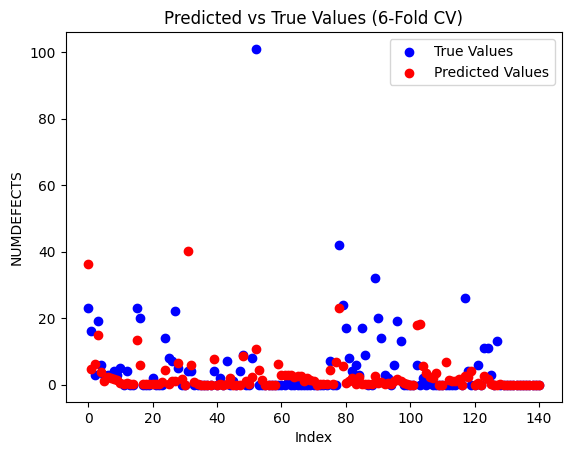

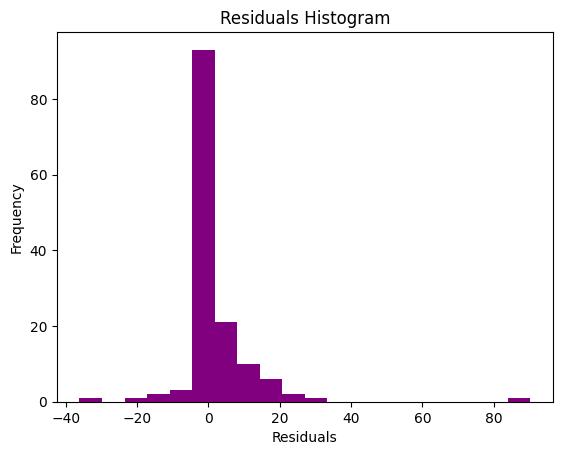

In [2]:
print('LOOCV')
loocv(X, y, svr)

print('\n10-fold')
k_fold_cv(X, y, svr, 6)

LOOCV
R squared (LOOCV): -3.6373829846287595
Average MSE (LOOCV): 41.33622494328635
Average RMSE (LOOCV): 6.429325387883736
Average MAE (LOOCV): 3.3944206878923873


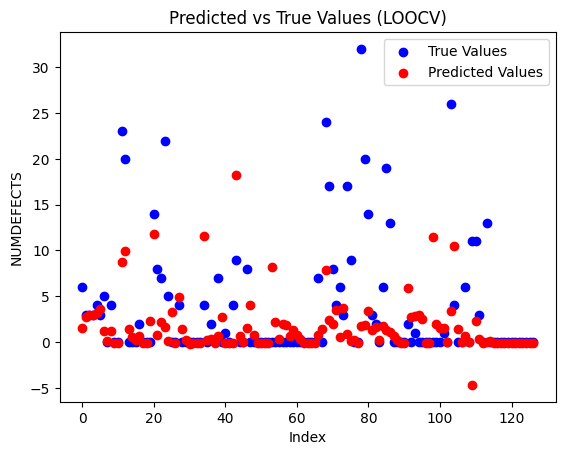

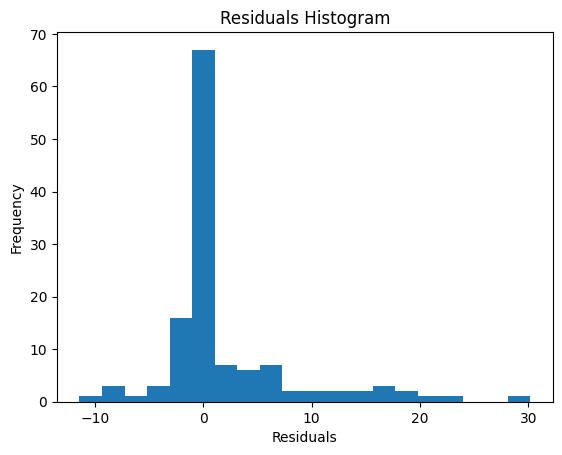


10-fold
Mean MSE: 43.95844354498542
Mean MAE: 3.6923933405013094
Mean R2: -0.28241952803688714
RMSE 6.630116405085617


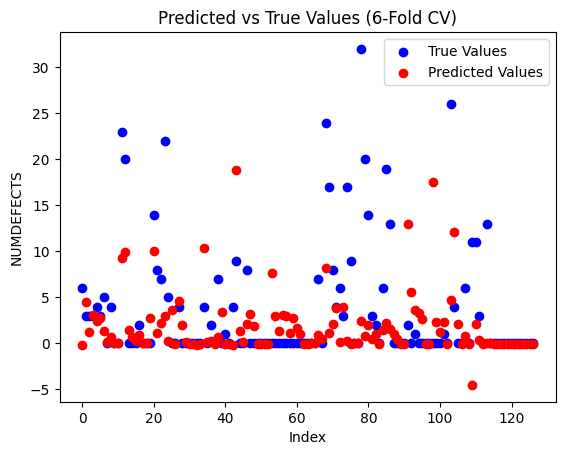

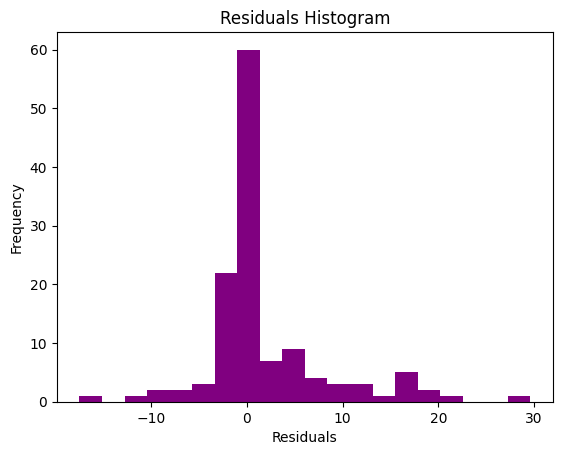

In [3]:
print('LOOCV')
loocv(X_filtered, y_filtered, svr)

print('\n10-fold')
k_fold_cv(X_filtered, y_filtered, svr, 6)